[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
prediction array
[True True True True True True True True True True True True True Tru

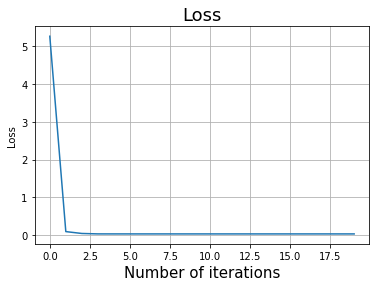

In [9]:
#Rich says this looks good enough!

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

#load iris dataset
iris = datasets.load_iris()

#sigmoid
def sigmoid(x):
  return 1.0/(1+np.exp(-x))


#// a method to load X,y with data set depending on method call(main)
# def new_xy():
#   X = np.array(iris.data[:,:2])
#   y = np.array(iris.target)
#   return [X,y]


#Learning rate 
LEARNING_RATE = 2.0
NUM_EPOCHS = 20


def get_loss(y, a):
  return -1 * (y * np.log(a) +
               (1-y) * np.log(1-a))

def get_loss_numerically_stable(y, z):
   return -1 * (y * -1 * np.log(1 + np.exp(-z)) +
                (1-y) * (-z - np.log(1 + np.exp(-z))))
   

def predict(a_j, j, predict):
  if (a_j > .5):
    predict[j] = True
  else:
    predict[j] = False
  

#Load data into values
X = np.array(iris.data[:,:2])
y = np.array(iris.target == 0) 


#made main function of program a method to call in main()
def method():
  print(y)
  # X = dataset[0]
  # y = dataset[1]
  w_cache = []
  b_cache = []
  l_cache = []
  data_size = len(y)


  # some nice initial value, so that the plot looks nice.
  w = np.array([-10.0, 10.0])
  b = 0.0

  for i in range(NUM_EPOCHS):
    pred = np.empty(150, dtype=object)
    dw = np.zeros(w.shape)
    db = 0.0
    loss = 0.0

    for j in range(X.shape[0]):
      x_j = X[j,:]
      y_j = y[j]

      z_j = w.dot(x_j) + b
      a_j = sigmoid(z_j)
      predict(a_j, j, pred)

      loss_j = get_loss_numerically_stable(y_j, z_j)

      dw_j = x_j * (a_j-y_j)
      db_j = a_j - y_j

      dw += dw_j
      db += db_j
      loss += loss_j

    # because we have 17 samples
    dw = (1.0/data_size) * dw
    db = (1.0/data_size) * db
    loss = (1.0/data_size) * loss

    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db

    w_cache.append(w.copy())
    b_cache.append(b)
    l_cache.append(loss)

  print("prediction array")
  print(pred)
  plt.grid()
  plt.title('Loss', size=18)
  plt.xlabel('Number of iterations', size=15)
  plt.ylabel('Loss', size=10)
  plt.plot(l_cache)

  #
  # plt.show()

  # plt.savefig('image.png')

  # plt.close()
  # plt.clf()
  # plt.cla()

#main
def main():
  method()




main()